<a href="https://colab.research.google.com/github/thiagoteles10/previsao-do-preco-de-pizza-machine-learning-/blob/main/ML(previs%C3%A3o_de_pre%C3%A7o_de_pizza).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você foi contratado por um empresário que deseja abrir uma pizzaria em uma determinada cidade, o empresário gostaria de saber algumas informações como qual tamanho de pizza é mais vendido por pizzaria, qual o tamanho mais vendido no geral, qual sabor é mais vendido, etc. Gere insights para que esse empresário possa tomar decisões baseado em informações.

In [15]:
#!pip install lazypredict

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
#from lazypredict.Supervised import LazyClassifier, LazyRegressor
#from lazypredict.Supervised import LazyRegressor
sns.set_theme(color_codes=True)


In [17]:
df= pd.read_csv('pizza_v1.csv')

In [18]:
df.head(3)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [20]:
#verificando valores duplicados
df_duplicated = df.duplicated().sum()
print(df_duplicated)

# deletando linhas duplicadas
df = df.drop_duplicates()


3


In [21]:
# fazendo a substituição de caracteres por espaços vazios
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp', '').str.replace(',','')

# convertendo de object para float
df['price_rupiah'] = df['price_rupiah'].astype(float)

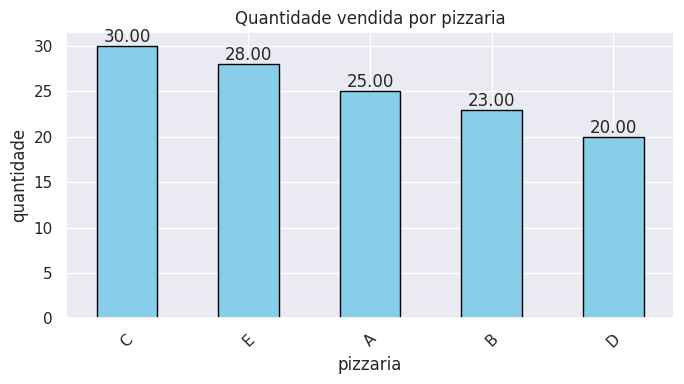

In [22]:
plt.figure(figsize=(7, 4))

# Distribuição das pizzas vendidas por empresa
pizza_distribution = df['company'].value_counts()
pizza_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

#adicionando valores acima da barra
for index, value in enumerate(pizza_distribution.sort_values(ascending=False)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.title('Quantidade vendida por pizzaria')
plt.xlabel('pizzaria')
plt.ylabel('quantidade')
plt.xticks(rotation=45)
plt.tight_layout()

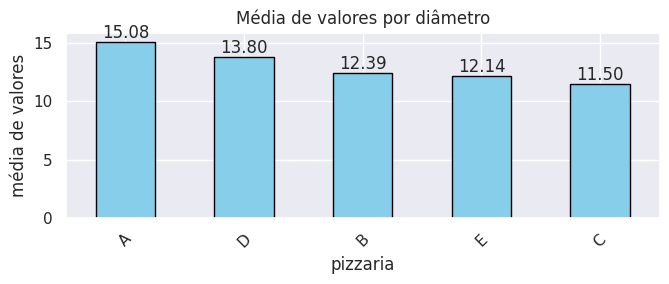

In [23]:
plt.figure(figsize=(7, 3))
preco_diam_company = df.groupby('company')['diameter'].mean()

# ordena os valores em ordem decrescente e gera o gráfico
preco_diam_company.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

#adicionando valores acima da barra
for index, value in enumerate(preco_diam_company.sort_values(ascending=False)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.title('Média de valores por diâmetro')
plt.xlabel('pizzaria')
plt.ylabel('média de valores')
plt.xticks(rotation=45)
plt.tight_layout()

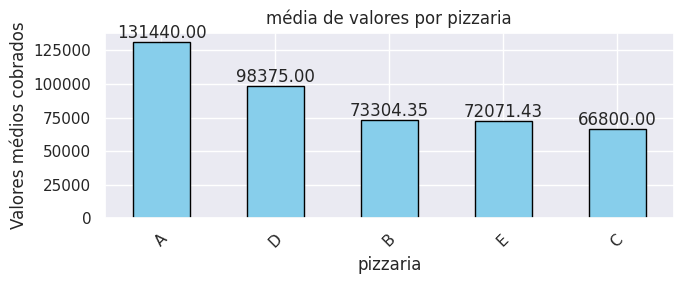

In [24]:
plt.figure(figsize=(7, 3))

preco_medio_company = df.groupby('company')['price_rupiah'].mean()

# Ordena os valores pela média e gera o gráfico de barras
preco_medio_company.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Adiciona os valores acima das barras
for index, value in enumerate(preco_medio_company.sort_values(ascending=False)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('média de valores por pizzaria')
plt.xlabel('pizzaria')
plt.ylabel('Valores médios cobrados')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [25]:
# utilizando uma função para separar as pizzas por tipo
def segment_variant(variant):
    if 'veggie' in variant:
        return 'pizza vegana'
    elif 'meat' in variant or 'BBQ' in variant:
        return 'pizza de carne'
    elif 'tuna' in variant:
        return 'pizza de atum'
    else:
        return 'outros sabores '

# aplicando a função na coluna 'variant' para separar as pizzas.
df['variant'] = df['variant'].apply(segment_variant)


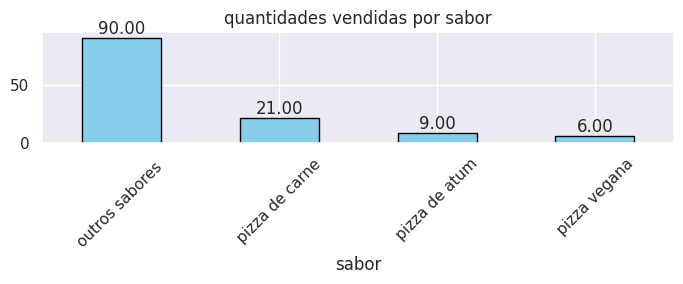

In [26]:
plt.figure(figsize=(7, 3))

vendas_sabor = df['variant'].value_counts()

# Ordena as quantidades por sabor e gera o gráfico de barras
vendas_sabor.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Adiciona os valores acima das barras
for index, value in enumerate(vendas_sabor.sort_values(ascending=False)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('quantidades vendidas por sabor')
plt.xlabel('sabor')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

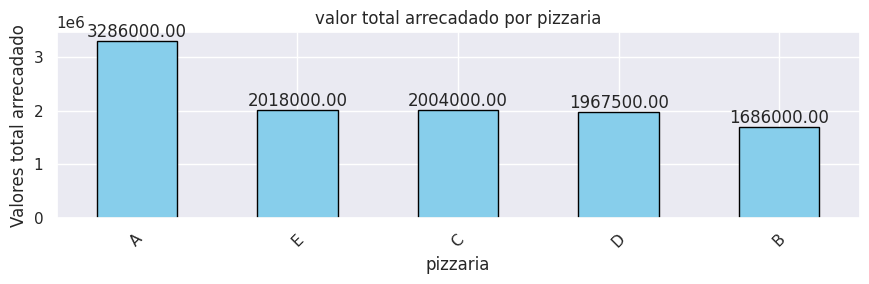

In [27]:
plt.figure(figsize=(9, 3))

valor_total_pizzaria = df.groupby('company')['price_rupiah'].sum()

# faz a soma dos valores totais de cada pizzaria e gera o gráfico de barras
valor_total_pizzaria.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Adiciona os valores acima das barras
for index, value in enumerate(valor_total_pizzaria.sort_values(ascending=False)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('valor total arrecadado por pizzaria')
plt.xlabel('pizzaria')
plt.ylabel('Valores total arrecadado')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

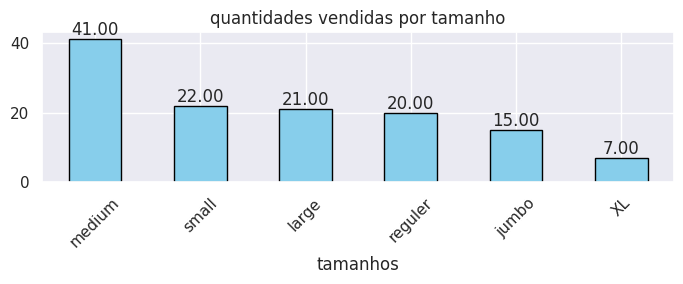

In [28]:
plt.figure(figsize=(7, 3))

vendas_tamanho = df['size'].value_counts()

# Ordena as quantidades por tamanho e gera o gráfico de barras
vendas_tamanho.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Adiciona os valores acima das barras
for index, value in enumerate(vendas_tamanho.sort_values(ascending=False)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('quantidades vendidas por tamanho')
plt.xlabel('tamanhos')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [29]:
# Comparar a distribuição dos tamanhos de pizza entre as pizzariass
size_distribution_by_company = df.groupby(['company', 'size']).size().unstack(fill_value=0)


<Figure size 1400x600 with 0 Axes>

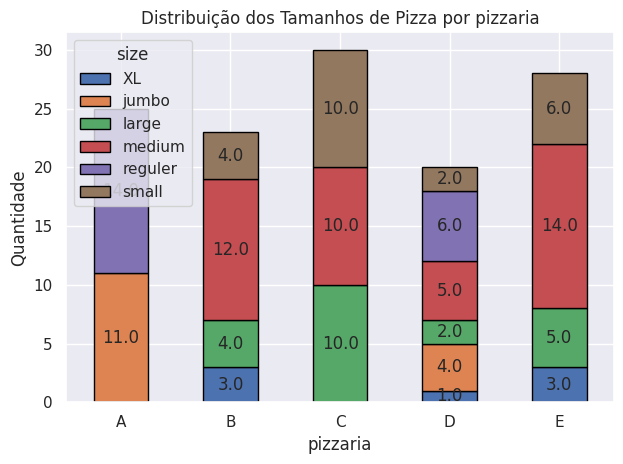

In [45]:


plt.figure(figsize=(14, 6))

# Vamos assumir que você possui um DataFrame chamado 'size_distribution_by_company' contendo os dados da distribuição dos tamanhos de pizza por empresa.

# Plotar a distribuição dos tamanhos de pizza entre as empresas em um gráfico de barras
ax = size_distribution_by_company.plot(kind='bar', stacked=True, edgecolor='black')

# Adicionar os valores dentro de cada barra (ignorando os valores iguais a zero)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Distribuição dos Tamanhos de Pizza por pizzaria')
plt.xlabel('pizzaria')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


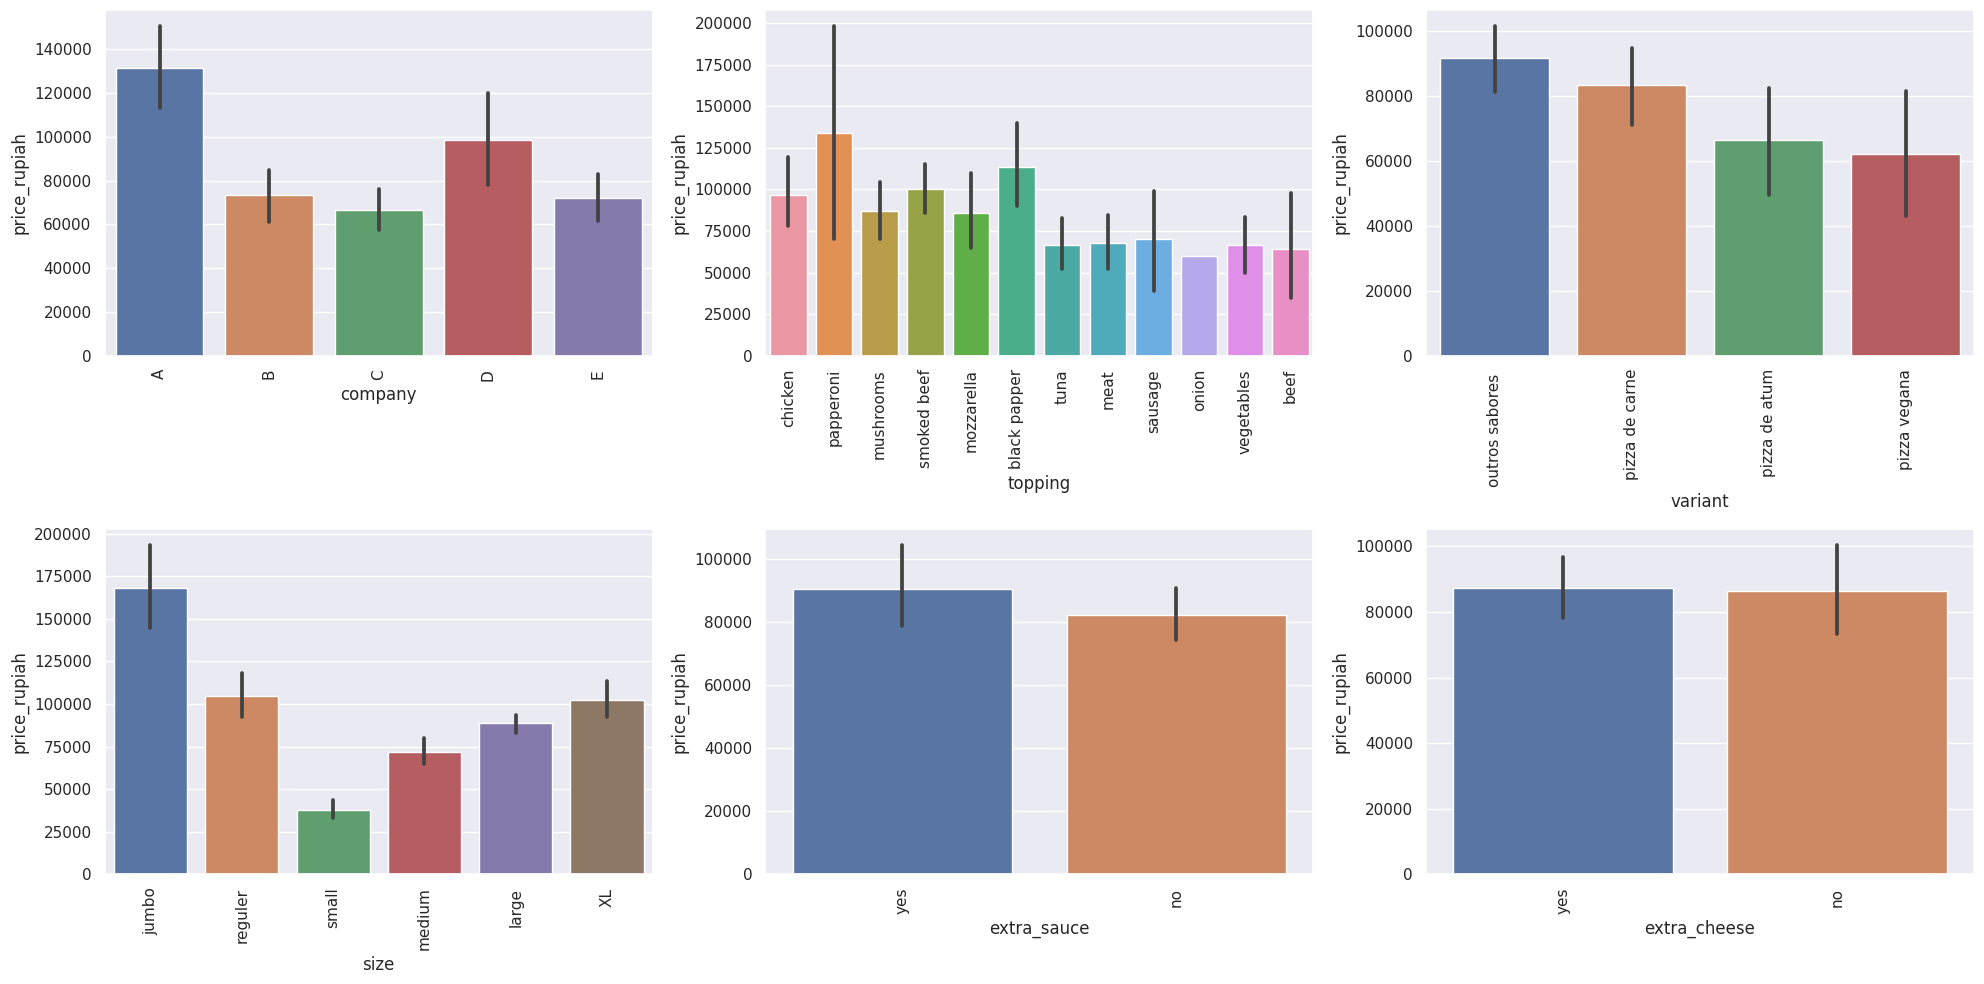

In [31]:
# plotando as variáveis categóricas
cat_vars = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese']

# criando uma figura com os subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.ravel()

# criando um barplot para cada variável categórica
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='price_rupiah', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)


fig.tight_layout()

# show plot
plt.show()

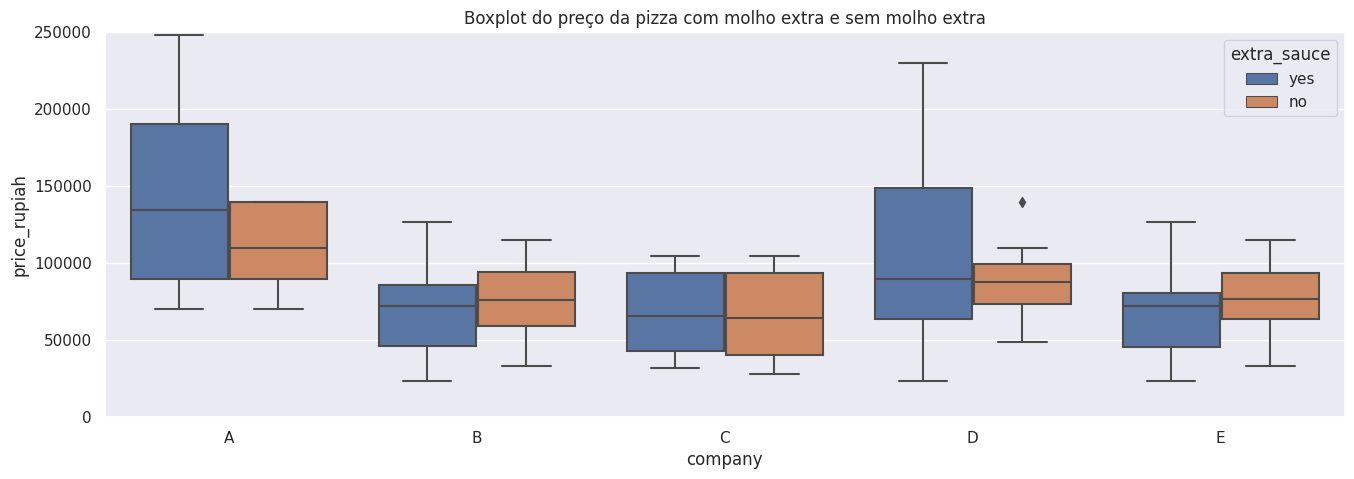

In [32]:

plt.figure(figsize=(16, 5))
sns.boxplot(x='company', y='price_rupiah', data=df, hue='extra_sauce')
plt.title('Boxplot do preço da pizza com molho extra e sem molho extra')
plt.ylim(0, 250000)
plt.show()

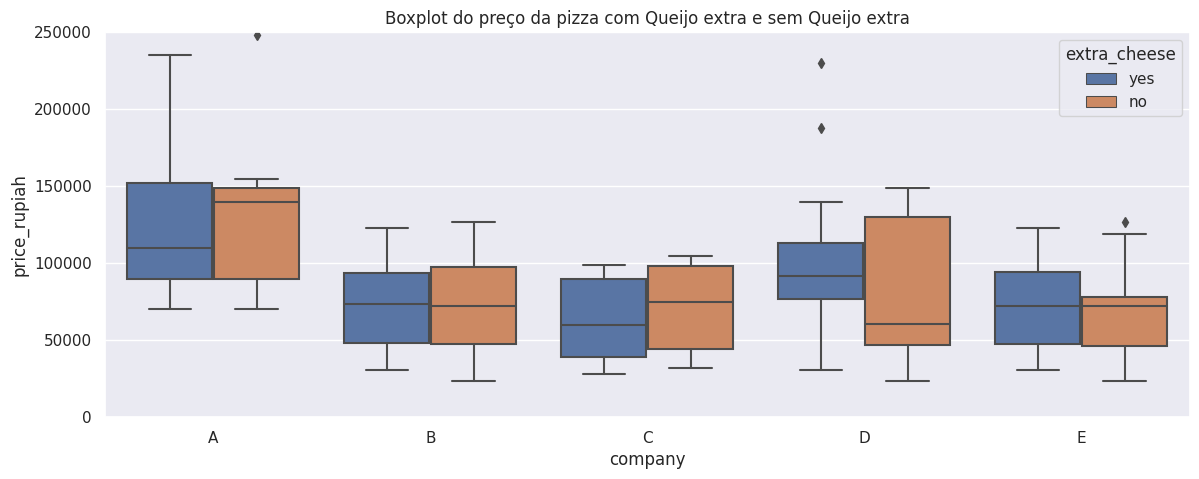

In [33]:
plt.figure(figsize=(14, 5))
sns.boxplot(x='company', y='price_rupiah', data=df, hue='extra_cheese')
plt.title('Boxplot do preço da pizza com Queijo extra e sem Queijo extra')
plt.ylim(0, 250000)
plt.show()

<ipython-input-34-a1950fa6a739>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


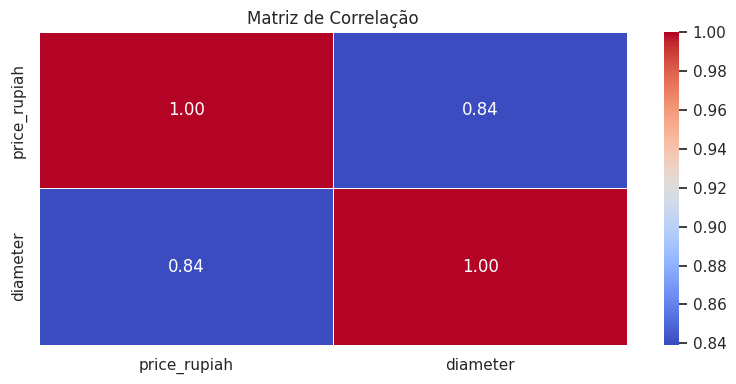

In [34]:
# plotando a correlação entre o diâmetro e o preço
correlation_matrix = df.corr()

# Plotar a matriz de correlação em um heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

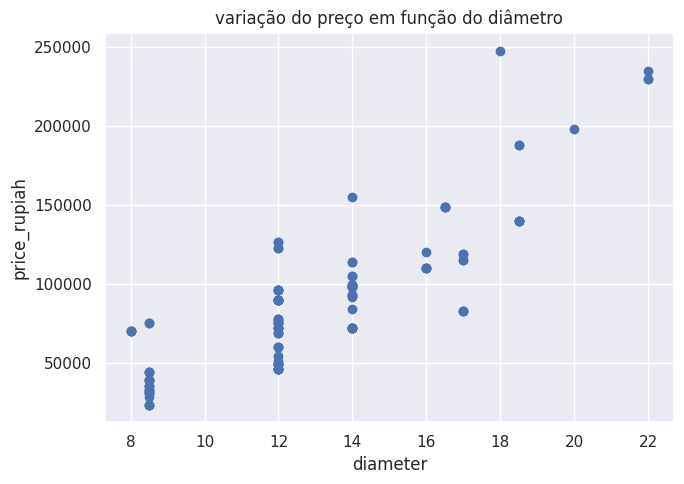

In [35]:
# confirmando a correlação entre entre preço e diâmetro
plt.figure(figsize=(7,5))
plt.scatter(df['diameter'],df['price_rupiah'])
plt.title('variação do preço em função do diâmetro')
plt.ylabel('price_rupiah')
plt.xlabel('diameter')
plt.tight_layout()
plt.show()

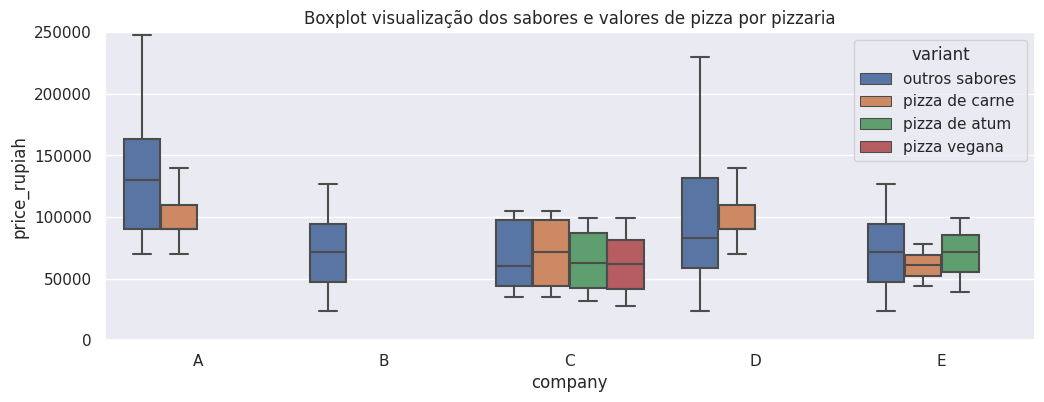

In [36]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='company', y='price_rupiah', data=df, hue='variant')
plt.title('Boxplot visualização dos sabores e valores de pizza por pizzaria')
plt.ylim(0, 250000)
plt.show()

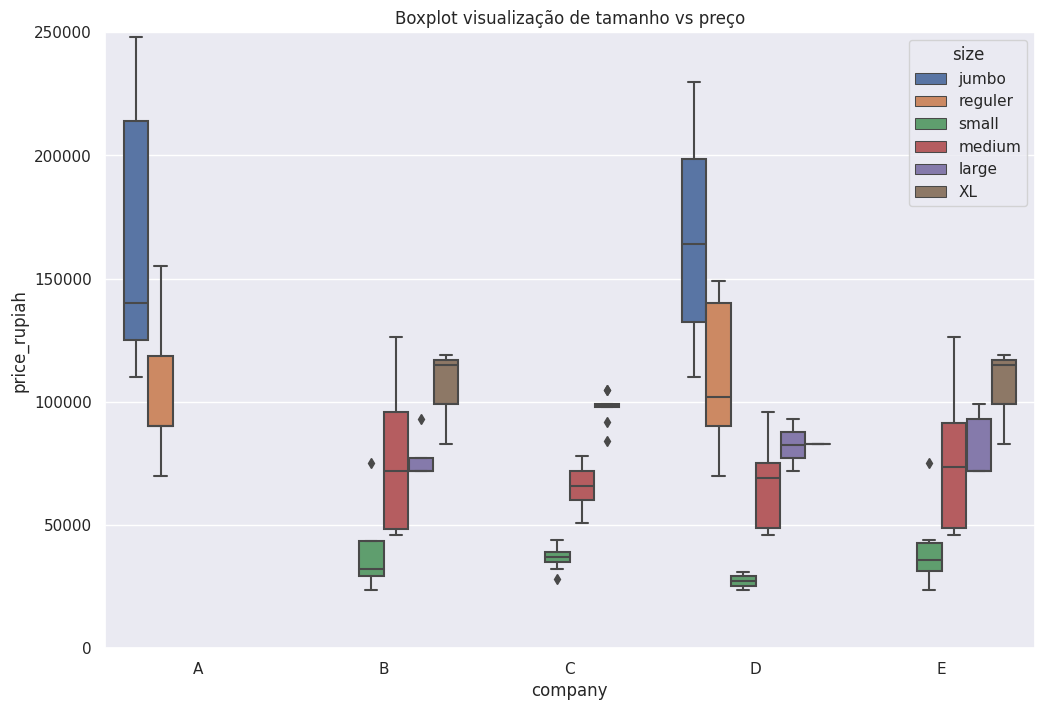

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='company', y='price_rupiah', data=df, hue='size')
plt.title('Boxplot visualização de tamanho vs preço')
plt.ylim(0, 250000)
plt.show()

## Utilizando o Lazy predict para selecionar os melhores algoritmos de machine learning para o modelo.

In [ ]:
!pip install lazypredict

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

# Carregar o dataset (substitua 'seu_arquivo.csv' pelo caminho para o arquivo CSV)
data = pd.read_csv('pizza_v1.csv')
data['price_rupiah'] = data['price_rupiah'].str.replace('Rp', '').str.replace(',','').astype(float)

# Separar as features (X) e o target (y)
X = data.drop('price_rupiah', axis=1)
y = data['price_rupiah']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Ver os resultados dos modelos
print(models)


100%|██████████| 42/42 [00:07<00:00,  5.79it/s]

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
XGBRegressor                                 0.95       0.96  11407.45   
DecisionTreeRegressor                        0.93       0.94  13378.13   
GradientBoostingRegressor                    0.93       0.94  13581.25   
RandomForestRegressor                        0.89       0.91  16906.80   
AdaBoostRegressor                            0.87       0.89  18146.33   
BaggingRegressor                             0.86       0.88  18989.85   
ExtraTreesRegressor                          0.85       0.87  19644.15   
PoissonRegressor                             0.77       0.82  23745.60   
Lars                                         0.76       0.80  24418.73   
TransformedTargetRegressor                   0.76       0.80  24608.61   
LinearRegression                             0.76       0.80  24608.61   
Lasso                                 

Vemos acima os algoritmos que melhor performam para o problema. Lembrando que é necessário algumas análises mais profundas que podem mudar o valor desses resultados.

## Machine learning

## Usando o DecisionTreeRegressor

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression


In [49]:
# Carregue seus dados em um DataFrame do pandas (por exemplo, df)
df1 = pd.read_csv('pizza_v1.csv')
df1['price_rupiah'] = df1['price_rupiah'].str.replace('Rp', '').str.replace(',','').astype(float)

In [50]:
# 2. Separar as features (variáveis independentes) e o target (variável dependente)
X = df1.drop('price_rupiah', axis=1)
y = df1['price_rupiah']

In [52]:
# 3. Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Criar o pré-processador das features
numeric_features = ['diameter']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['company', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# 5. Criar o pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),                # Pré-processamento das features
    ('feature_selector', SelectKBest()),           # Seleção das melhores features
    ('regressor', DecisionTreeRegressor())         # Regressor (Random Forest neste exemplo)
])

# 6. Treinar o pipeline no conjunto de treinamento
pipeline.fit(X_train, y_train)

# avaliar modelo no conjunto de treino
train_score = pipeline.score(X_train, y_train)

# avaliar modelo no conjunto de teste
test_score = pipeline.score(X_test, y_test)

# 7. Fazer previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

# Print the train and test scores
print('Train score:', train_score)
print('Test score:', test_score)
print('\n')

# 8. Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

print("Erro Quadrático Médio (MSE):", mse)
print("Erro Absoluto Médio (MAE):", mae)
print("Coeficiente de Determinação (R²):", r2)
print("Erro Quadrático Médio Logarítmico (MSLE):", msle)
print('média Absoluta dos erros quadráticos:', rmse)

Train score: 0.9090353874736404
Test score: 0.8475496343507196


Erro Quadrático Médio (MSE): 465918286.29949933
Erro Absoluto Médio (MAE): 11948.849441157134
Coeficiente de Determinação (R²): 0.8475496343507196
Erro Quadrático Médio Logarítmico (MSLE): 0.05478052177854472
média Absoluta dos erros quadráticos: 21585.140404905855


#######################################################3

Train score: 0.9090353874736404
Test score: 0.8475496343507196




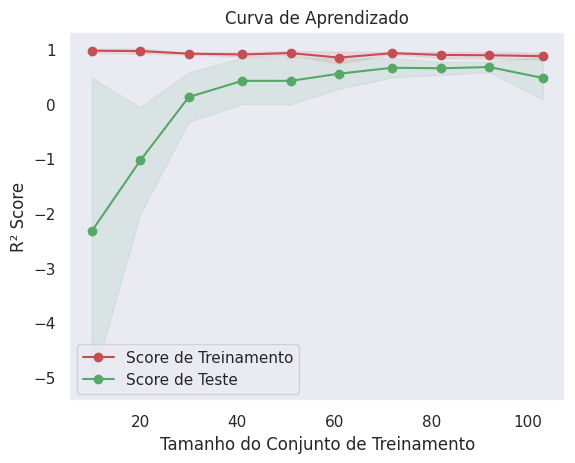

In [53]:
from sklearn.model_selection import learning_curve


# 6. Treinar o pipeline no conjunto de treinamento
pipeline.fit(X_train, y_train)

# 7. Fazer previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

# Print the train and test scores
print('Train score:', train_score)
print('Test score:', test_score)
print('\n')


# Plotar as curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("R² Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de Teste")
plt.legend(loc="best")
plt.show()


## Usando XGBregressor

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from xgboost import XGBRegressor  # Adicionar esta importação

# Carregue o conjunto de dados
# Substitua 'seu_dataset.csv' pelo nome do arquivo contendo seus dados
data = pd.read_csv('pizza_v1.csv')
data['price_rupiah'] = data['price_rupiah'].str.replace('Rp', '').str.replace(',','').astype(float)

# Separar as features (X) e a variável alvo (y)
X = data.drop('price_rupiah', axis=1)
y = data['price_rupiah']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o pré-processador das features
numeric_features = ['diameter']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['company', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Criar o pipeline completo com XGBRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),                # Pré-processamento das features
    ('feature_selector', SelectKBest()),           # Seleção das melhores features
    ('regressor', XGBRegressor())                  # Regressor (XGBoost Regressor)
])

# Treinar o pipeline no conjunto de treinamento
pipeline.fit(X_train, y_train)

# avaliar modelo no conjunto de treino
train_score = pipeline.score(X_train, y_train)

# avaliar modelo no conjunto de teste
test_score = pipeline.score(X_test, y_test)

# Fazer previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

# Print the train and test scores
print('Train score:', train_score)
print('Test score:', test_score)
print('\n')

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

print("Erro Quadrático Médio (MSE):", mse)
print("Erro Absoluto Médio (MAE):", mae)
print("Coeficiente de Determinação (R²):", r2)
print("Erro Quadrático Médio Logarítmico (MSLE):", msle)
print('média Absoluta dos erros quadráticos:', rmse)


Train score: 0.9090353874732223
Test score: 0.8762118928365734


Erro Quadrático Médio (MSE): 378320789.9056604
Erro Absoluto Médio (MAE): 10966.117087339744
Coeficiente de Determinação (R²): 0.8762118928365734
Erro Quadrático Médio Logarítmico (MSLE): 0.05210258570288719
média Absoluta dos erros quadráticos: 19450.47017184059


Train score: 0.9090353874732223
Test score: 0.8762118928365734




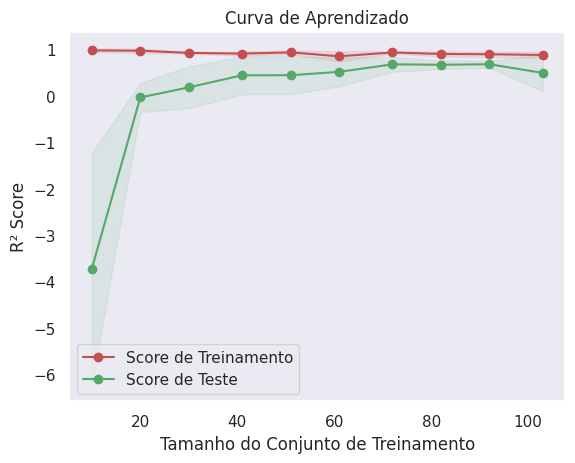

In [55]:
from sklearn.model_selection import learning_curve


# 6. Treinar o pipeline no conjunto de treinamento
pipeline.fit(X_train, y_train)

# 7. Fazer previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

# Print the train and test scores
print('Train score:', train_score)
print('Test score:', test_score)
print('\n')


# Plotar as curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("R² Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de Teste")
plt.legend(loc="best")
plt.show()